In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.preprocessing import quantile_transform

%matplotlib inline

In [2]:
plt.style.use('seaborn')

In [3]:
full = pd.read_csv('data/CA1_6_1_clean.csv')

In [4]:
full.head()

,time,0N,1N,2N,3N,4N,5N,6N,7N,8N,...,583N,584N,585N,586N,587N,588N,589N,x,y,segment
0,6,-0.004105,-0.002713,0.002400,-0.002804,0.013982,0.004319,-0.003357,-0.001776,-0.002052,...,0.000585,0.005413,0.009618,0.004061,0.004675,0.001152,-0.000333,-15.463624,2.932973,4.0
1,7,-0.004401,-0.004511,0.001104,-0.002070,0.012163,0.003325,-0.001147,-0.003996,-0.003540,...,-0.000170,0.007227,0.008670,0.006076,0.006172,-0.001081,-0.002290,-16.404171,3.408579,4.0
2,8,-0.003786,-0.005022,0.001733,-0.000330,0.013810,0.003872,-0.003216,-0.002088,-0.003463,...,-0.001343,0.007866,0.008944,0.009129,0.003572,0.000140,-0.003384,-17.335852,3.910841,4.0
3,9,-0.005539,-0.005892,-0.000947,-0.003324,0.012719,0.001616,-0.002414,-0.003358,-0.002223,...,0.000458,0.006610,0.009690,0.007303,0.006286,-0.001653,-0.002121,-18.261171,4.434826,4.0
4,10,-0.004962,-0.007518,0.002856,-0.002459,0.012671,0.004508,-0.002190,-0.003734,-0.000925,...,-0.000420,0.006400,0.007676,0.003326,0.006363,-0.001662,-0.003236,-19.161957,5.008783,4.0


Idea:
* Take n(say, 20) best neurons that have highest MI with some variable (probably angle or a segment)
* Look at their time series in dynamics

In [5]:
def get_angle(coordinates, cx = 0, cy = 0):
    return np.angle((coordinates['x'] - cx) + 1j * (coordinates['y'] - cy))

In [6]:
x_max, y_max = full[['x', 'y']].max()
x_min, y_min = full[['x', 'y']].min()

radius_x = (x_max - x_min) / 2
radius_y = (y_max - y_min) / 2
radius = (radius_x+radius_y)/2

cx1 = x_max - radius
cx2 = x_min + radius
cx = (cx1 + cx2) / 2
cy1 = y_max - radius
cy2 = y_min + radius
cy = (cy1 + cy2) / 2

In [7]:
get_angle({'x': -1, 'y':-1})
# it works

-2.356194490192345

The only problem is the 180 deg angle => See how the model performs

In [8]:
mi = full.copy()

In [9]:
mi['ang'] = get_angle(mi, cx, cy)

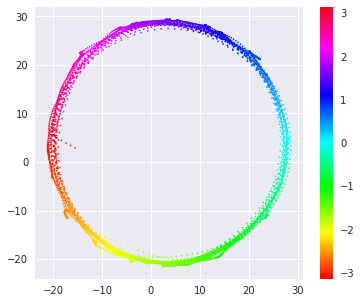

In [10]:
fig, ax = plt.subplots(figsize=(6, 5), ncols=1)
plt.scatter(mi['x'], mi['y'],
        c=mi['ang'],
        cmap='hsv',
        linewidth=0,
        s=2.5)
plt.plot(cx, cy, 'cx') 
plt.colorbar();

In [11]:
full = mi.copy()

In [12]:
mi.drop(['time', 'segment', 'x', 'y'], axis=1, inplace=True)

## MI

In [ ]:
N_NEURONS = 20

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
mi_scores = mutual_info_regression(mi.drop(['ang'], axis=1), mi['ang'])

In [ ]:
mi_scores_df = pd.DataFrame([mi_scores], columns=mi.drop(['ang'],axis=1).columns).T.rename(columns={0: 'mi_score'})

In [ ]:
mi_scores_df

mi_scores_df.index

In [ ]:
mi_scores_df = mi_scores_df.sort_values(by=['mi_score'], ascending=False)

In [ ]:
mi_scores_df = mi_scores_df.iloc[:N_NEURONS]

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), ncols=1)

ax = sns.barplot(x=mi_scores_df['mi_score'], y=mi_scores_df.index, ax=ax);
ax.set_title("MI-scores of 24 best neurons");
fig.tight_layout();

# Plotting the path

In [ ]:
dims = 2
step_n = 10
step_set = [-1, 0, 1]
origin = np.zeros((1, dims))

step_shape = (step_n, dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]

In [ ]:
path

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), ncols=1)

ax.scatter(path[:,0], path[:,1], c='blue', alpha=0.25)
ax.plot(path[:,0], path[:,1], c='blue', alpha=0.5, lw=1, ls='solid')
plt.tight_layout(pad=0)

In [13]:
%matplotlib notebook

<IPython.core.display.Javascript object>


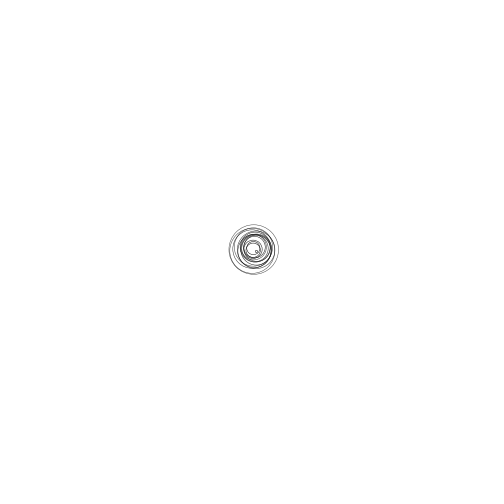

<ipython-input-65-b1a27ed7f749>:17: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Fixing random state for reproducibility
np.random.seed(19680801)


# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation director.
animation = FuncAnimation(fig, update, interval=100)
plt.show()

In [ ]:
%matplotlib inline

In [64]:
np.array([full[:n_drops]['x'], full[:n_drops]['y']]).shape

(2, 50)

In [62]:
np.random.uniform(0, 1, (n_drops, 2)).shape

(50, 2)

<IPython.core.display.Javascript object>


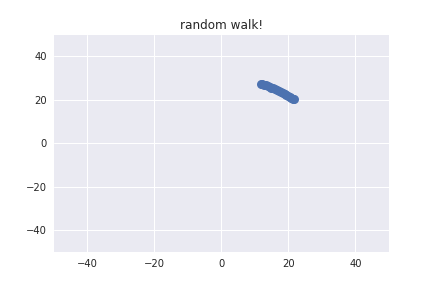

In [67]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 

i = 0
fig = plt.figure() 
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50)) 
scat = ax.scatter(full[i:i+20]['x'], full[i:i+20]['y'], lw=2) 


# animation function 
def animate(i):
    print(i)
    scat.set_offsets(np.array([full[i:i+20]['x'], full[i:i+20]['y']]).T)

# setting a title for the plot 
plt.title('random walk!') 
# hiding the axis details 
#plt.axis('off') 

# call the animator
anim = animation.FuncAnimation(fig, animate,frames=full.shape[0],
                               interval=20, repeat=True, blit=True) 
plt.show()